In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colors
from matplotlib.colors import LogNorm
import math

%matplotlib inline
from scipy.optimize import curve_fit, minimize
import strax
import straxbra
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import matplotlib.patches as patches

In [5]:
run_list = ['00186','00187','00188','00189','00190','00191']
S2s_all_runs = {}
for run in run_list:
    ctx = straxbra.XebraContext()
    peaks_data = ctx.get_array(run, 'peaks')
    waveform = peaks_data['data']
    integral = peaks_data['area']
    width = peaks_data['width'][:,5]
    timestamp = peaks_data['time']
    area_per_channel = peaks_data['area_per_channel']
    
    def CutCondition(waveform):  
        FirstPeak_area = sum(waveform[:15])
        SecondPeak_area = sum(waveform[15:])    
        if  FirstPeak_area > 100 and FirstPeak_area < 600 and SecondPeak_area > 40 and SecondPeak_area  < 200: 
            return(True)
        else:
            return(False)
    
    def S2_found(integral, width):
        if integral > 500 and width >200 and width < 2000:
            return True
        else:
            return False
        
    def Process(waveform,i):

        CutFlag = CutCondition(waveform[i])
        if CutFlag == True:

#         PrintWaveform(waveform)
            j = 1
            counter_timestamp = timestamp[i+j]
            threshold_timestamp = timestamp[i] + 55000
      
            while threshold_timestamp >= counter_timestamp and S2_found(integral = integral[i+j], width = width[i+j]) == False: 
                j += 1
                counter_timestamp = timestamp[i+j]           
            else:
                if S2_found(integral = integral[i+j], width = width[i+j]):
                    kr_s2_area.append(integral[i+j])
                    
    kr_s2_area = []
    for i in range(0,len(waveform)):    
        Process(waveform,i)
        
    S2s_all_runs.update({run:kr_s2_area})

/software/anaconda3/envs/strax/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


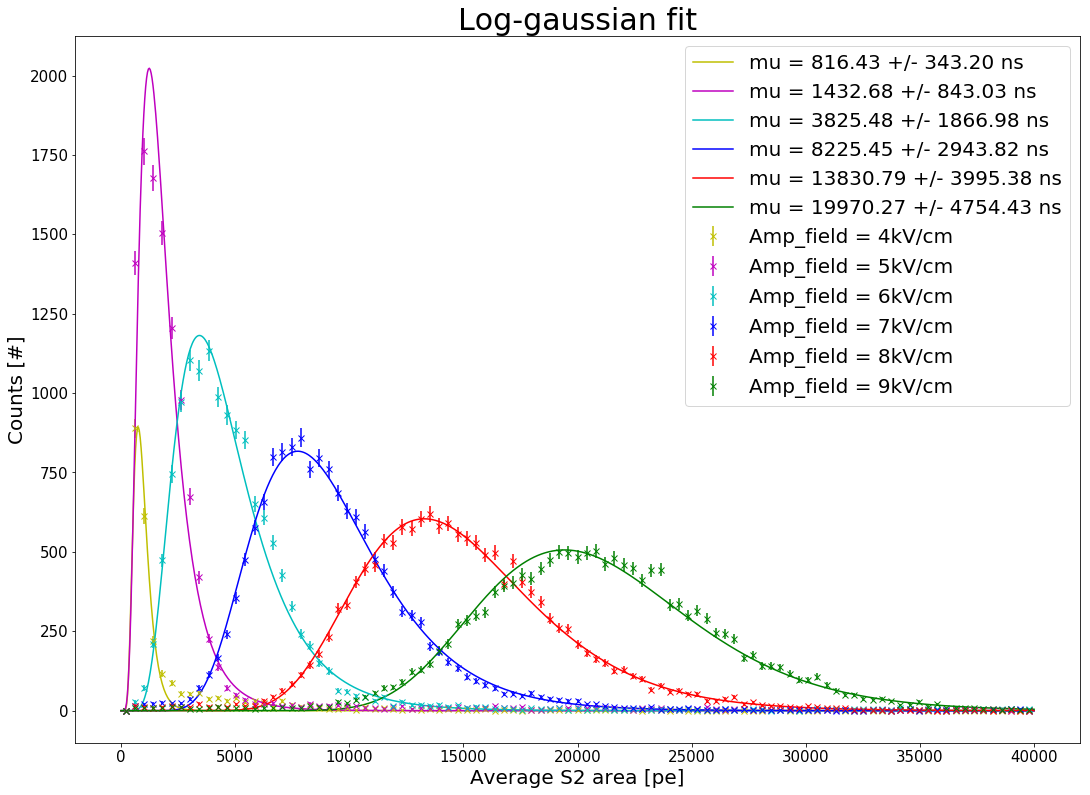

S2 gain for 500V/cm drift field and 9kV/cm amplification field:  14.213713324678578 +/- 3.3839391762603177


In [7]:
fig, ax = plt.subplots(figsize = (18,13))
def log_gaus(x, h, mu, sigma):

    log_gaus = h * np.exp(-(np.log(x)-mu)**2         /(2*sigma**2))
    return log_gaus

p0_log = [10,10,10]
SIZE = 20
EXTRA_SIZE = 30
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)


n2000, binEdges = np.histogram(S2s_all_runs['00190'], bins=np.linspace(0,40000,100))  #anode at 0V
n2500, binEdges = np.histogram(S2s_all_runs['00189'], bins=np.linspace(0,40000,100))  #anode at 500V
n3000, binEdges = np.histogram(S2s_all_runs['00188'], bins=np.linspace(0,40000,100))  #anode at 1000V
n3500, binEdges = np.histogram(S2s_all_runs['00187'], bins=np.linspace(0,40000,100))  #anode at 1500V
n4000, binEdges = np.histogram(S2s_all_runs['00186'], bins=np.linspace(0,40000,100))  #anode at 2000V 
n4500, binEdges = np.histogram(S2s_all_runs['00191'], bins=np.linspace(0,40000,100))  #anode at 2500V

bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
x_range = np.linspace(0,40000,1000)

popt4500V, pcov4500V = curve_fit(log_gaus, bincenters, n4500, p0_log,  sigma=np.maximum(np.sqrt(n4500), np.ones_like(n4500)), maxfev = 10000)
popt4000V, pcov4000V = curve_fit(log_gaus, bincenters, n4000, p0_log,  sigma=np.maximum(np.sqrt(n4000), np.ones_like(n4000)), maxfev = 10000)
popt3500V, pcov3500V = curve_fit(log_gaus, bincenters, n3500, p0_log,  sigma=np.maximum(np.sqrt(n3500), np.ones_like(n3500)), maxfev = 10000)
popt3000V, pcov3000V = curve_fit(log_gaus, bincenters, n3000, p0_log,  sigma=np.maximum(np.sqrt(n3000), np.ones_like(n3000)), maxfev = 10000)
popt2500V, pcov2500V = curve_fit(log_gaus, bincenters, n2500, p0_log,  sigma=np.maximum(np.sqrt(n2500), np.ones_like(n2500)), maxfev = 10000)
popt2000V, pcov2000V = curve_fit(log_gaus, bincenters, n2000, p0_log,  sigma=np.maximum(np.sqrt(n2000), np.ones_like(n2000)), maxfev = 10000)

S2_mu_4500V = np.exp(popt4500V[1]+((popt4500V[2]**2)/2))
S2_mu_4500V_str = "%.2f" % S2_mu_4500V
S2_sigma_4500V = np.exp(popt4500V[1]+((popt4500V[2]**2)/2))    * np.sqrt(np.exp(popt4500V[2]**2)-1)
S2_sigma_4500V_str = "%.2f" % S2_sigma_4500V


S2_mu_4000V = np.exp(popt4000V[1]+((popt4000V[2]**2)/2))
S2_mu_4000V_str = "%.2f" % S2_mu_4000V
S2_sigma_4000V = np.exp(popt4000V[1]+((popt4000V[2]**2)/2))    * np.sqrt(np.exp(popt4000V[2]**2)-1)
S2_sigma_4000V_str = "%.2f" % S2_sigma_4000V

S2_mu_3500V = np.exp(popt3500V[1]+((popt3500V[2]**2)/2))
S2_mu_3500V_str = "%.2f" % S2_mu_3500V
S2_sigma_3500V = np.exp(popt3500V[1]+((popt3500V[2]**2)/2))    * np.sqrt(np.exp(popt3500V[2]**2)-1)
S2_sigma_3500V_str = "%.2f" % S2_sigma_3500V

S2_mu_3000V = np.exp(popt3000V[1]+((popt3000V[2]**2)/2))
S2_mu_3000V_str = "%.2f" % S2_mu_3000V
S2_sigma_3000V = np.exp(popt3000V[1]+((popt3000V[2]**2)/2))    * np.sqrt(np.exp(popt3000V[2]**2)-1)
S2_sigma_3000V_str = "%.2f" % S2_sigma_3000V

S2_mu_2500V = np.exp(popt2500V[1]+((popt2500V[2]**2)/2))
S2_mu_2500V_str = "%.2f" % S2_mu_2500V
S2_sigma_2500V = np.exp(popt2500V[1]+((popt2500V[2]**2)/2))    * np.sqrt(np.exp(popt2500V[2]**2)-1)
S2_sigma_2500V_str = "%.2f" % S2_sigma_2500V

S2_mu_2000V = np.exp(popt2000V[1]+((popt2000V[2]**2)/2))
S2_mu_2000V_str = "%.2f" % S2_mu_2000V
S2_sigma_2000V = np.exp(popt2000V[1]+((popt2000V[2]**2)/2))    * np.sqrt(np.exp(popt2000V[2]**2)-1)
S2_sigma_2000V_str = "%.2f" % S2_sigma_2000V


ax.errorbar(bincenters, n2000, yerr=np.sqrt(n2000),c = 'y', marker = 'x', fmt='.', label='Amp_field = 4kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt2000V), color = 'y', label = 'mu = '+str(S2_mu_2000V_str)+ ' +/- '+str(S2_sigma_2000V_str)+' ns')
ax.errorbar(bincenters, n2500, yerr=np.sqrt(n2500),c = 'm', marker = 'x', fmt='.', label='Amp_field = 5kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt2500V), color = 'm', label = 'mu = '+str(S2_mu_2500V_str)+ ' +/- '+str(S2_sigma_2500V_str)+' ns')
ax.errorbar(bincenters, n3000, yerr=np.sqrt(n3000),c = 'c', marker = 'x', fmt='.', label='Amp_field = 6kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt3000V), color = 'c', label = 'mu = '+str(S2_mu_3000V_str)+ ' +/- '+str(S2_sigma_3000V_str)+' ns')
ax.errorbar(bincenters, n3500, yerr=np.sqrt(n3500),c = 'b', marker = 'x', fmt='.', label='Amp_field = 7kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt3500V), color = 'b', label = 'mu = '+str(S2_mu_3500V_str)+ ' +/- '+str(S2_sigma_3500V_str)+' ns')
ax.errorbar(bincenters, n4000, yerr=np.sqrt(n4000),c = 'r', marker = 'x', fmt='.', label='Amp_field = 8kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt4000V), color = 'r', label = 'mu = '+str(S2_mu_4000V_str)+ ' +/- '+str(S2_sigma_4000V_str)+' ns')
ax.errorbar(bincenters, n4500, yerr=np.sqrt(n4500), fmt='.',c = 'g', marker = 'x', label='Amp_field = 9kV/cm')
ax.plot(x_range,log_gaus(x_range,*popt4500V), color = 'g', label = 'mu = '+str(S2_mu_4500V_str)+ ' +/- '+str(S2_sigma_4500V_str)+' ns')
ax.set_title('Log-gaussian fit')
ax.set_ylabel('Counts [#]')
ax.set_xlabel('Average S2 area [pe]')
plt.legend()
plt.show()


print('S2 gain for 500V/cm drift field and 9kV/cm amplification field: ', S2_mu_4500V/1405, '+/-', S2_sigma_4500V/1405)

[843.0345223590266, 1866.9811592436654, 2943.8159935471217, 3995.3838697494207, 4754.434542645747]
[1432.677065851162, 3825.4800292957293, 8225.450597213174, 13830.790944237257, 19970.267221173403]


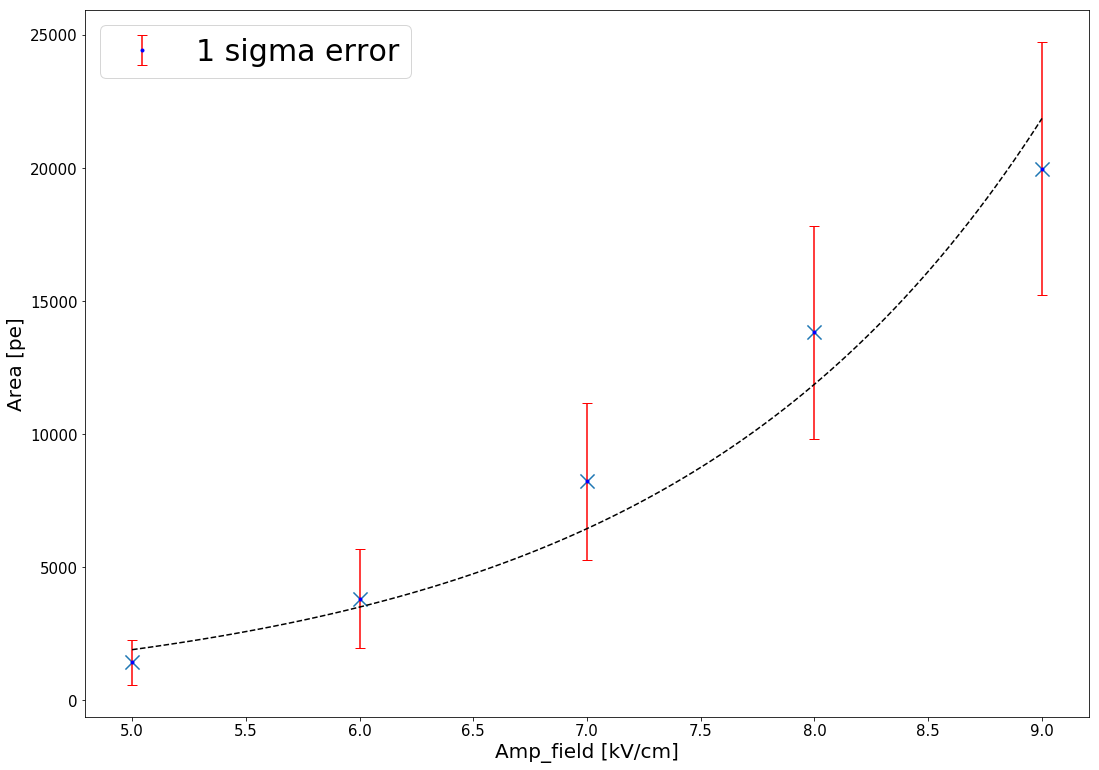

In [8]:
fig, ax = plt.subplots(1,1, figsize=(18,13))
def expo(x, a, b):
    return a*np.exp(-b*x)
p0 = [1,1]
ax = plt.gca()
SIZE = 20
EXTRA_SIZE = 30

plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=EXTRA_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)


# S2_average_width = [popt2500V[1],popt3000V[1],popt3500V[1],popt4000V[1],popt4500V[1]]
# S2_average_width_sigma = [popt2500V[2],popt3000V[2],popt3500V[2],popt4000V[2],popt4500V[2]]

S2_average_area = [S2_mu_2500V, S2_mu_3000V, S2_mu_3500V ,S2_mu_4000V ,S2_mu_4500V]
S2_average_area_sigma = [S2_sigma_2500V, S2_sigma_3000V ,S2_sigma_3500V ,S2_sigma_4000V ,S2_sigma_4500V]
U_amp = [5, 6, 7 ,8, 9]

print(S2_average_area_sigma)
print(S2_average_area)
plt.scatter(U_amp, S2_average_area, marker = 'x', s=200)
plt.errorbar(U_amp, S2_average_area, yerr=S2_average_area_sigma, marker= '.', ecolor='red', capsize=5, fmt = 'bx', label='1 sigma error')
x = np.linspace(5,9,5)
x_range= np.linspace(5,9,100)
popt, pcov = curve_fit(expo, x, S2_average_area, sigma=S2_average_area_sigma, p0=p0, absolute_sigma=True, maxfev= 10000)
# fit = np.polyfit(U_amp,S2_average_area,1)
# fit_fn = np.poly1d(fit)
plt.plot(x_range, expo(x_range,*popt), '--k')
#plt.fill_between(kr_energy, kr_list-kr_sigma_list, kr_list+kr_sigma_list)
ax.set_xlabel('Amp_field [kV/cm]')
ax.set_ylabel('Area [pe]')
#ax.set_ylim([0,25000])
plt.legend(loc =2,prop={'size': 30})
plt.show()